In [1]:
import scipy.stats as stats 
import numpy as np
import pandas as pd
import torch
import random
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
torch.random.manual_seed(5566)
np.random.seed(5566)
random.seed(5566)

X = torch.rand((5,1))
Y = torch.rand((5,1))

In [3]:
def validate_actions(all_actions, actions, action_similarities, threshold):
    
    action_idxs = []
    
    for a in actions:
        action_idx.append(all_actions.index(a))
        
    for a1 in action_idxs:
        for a2 in action_idxs:
            if action_similarities[a1, a2] > threshold:
                return False
            
    return True

def normalize_skeleton_data(df, x_cols, y_cols, x_center, y_center):
    
    df_x = df[x_cols].sub(x_center, axis=0)
    df_y = df[y_cols].sub(y_center, axis=0)
    
    return df_x, df_y

def normalize_hand_data(df, x_hand_cols, y_hand_cols, x_hand_root, y_hand_root):
    
    df_hand_x = df[x_hand_cols].sub(x_hand_root, axis=0)
    df_hand_y = df[y_hand_cols].sub(y_hand_root, axis=0)
    
    return df_hand_x, df_hand_y


In [4]:
W_LIST_LEFT_HAND = [
        "l_w",
        "l_t_c",
        "l_t_m",
        "l_t_i",
        "l_t_t",
        "l_i_m",
        "l_i_p",
        "l_i_d",
        "l_i_t",
        "l_m_m",
        "l_m_p",
        "l_m_d",
        "l_m_t",
        "l_r_m",
        "l_r_p",
        "l_r_d",
        "l_r_t",
        "l_p_m",
        "l_p_p",
        "l_p_d",
        "l_p_t",
    ]

W_LIST_RIGHT_HAND = [
        "r_w",
        "r_t_c",
        "r_t_m",
        "r_t_i",
        "r_t_t",
        "r_i_m",
        "r_i_p",
        "r_i_d",
        "r_i_t",
        "r_m_m",
        "r_m_p",
        "r_m_d",
        "r_m_t",
        "r_r_m",
        "r_r_p",
        "r_r_d",
        "r_r_t",
        "r_p_m",
        "r_p_p",
        "r_p_d",
        "r_p_t",
    ]

W_LIST_POSE = [
        "n", 
        "lei", 
        "le", 
        "leo", 
        "rei",
        "re",
        "reo",
        "lea",
        "rea",
        "ml",
        "mr",
        "ls",
        "rs",
        "lel",
        "rel",
        "lw",
        "rw",
        "lp",
        "rp",
        "li",
        "ri",
        "lt",
        "rt",
        "lh",
        "rh",
        "lk",
        "rk",
        "la",
        "ra",
        "lhe",
        "rhe",
        "lf",
        "rf"
    ]

In [5]:
data_path = "..\\data\\actions"

In [6]:
pose_actions = ["lift", "punch", "trample", "sit", "jump", "run", "walk", "fists_waist", "point_left", "point_right", "stand"]
hand_actions = ["zero", "one", "two", "three", "view_left", "view_right", "gesture_none"]
actions = pose_actions + hand_actions

'''
target_columns = [key + "_x" for key in W_LIST_RIGHT_HAND] + [key + "_y" for key in W_LIST_RIGHT_HAND]
target_columns += [key + "_x" for key in W_LIST_LEFT_HAND] + [key + "_y" for key in W_LIST_LEFT_HAND]
#target_columns += [key + "_x" for key in W_LIST_POSE] + [key + "_y" for key in W_LIST_POSE]
target_columns_x = target_columns.copy()
target_columns += ["image_name", "label"]
'''

dfs = []
for idx, action in enumerate(actions):
    file_path = os.path.join(data_path, action, "data.csv")
    df = pd.read_csv(file_path)

    df.label = idx
    dfs.append(df)

In [7]:
df_train = pd.concat(dfs)
df_train.reset_index(drop=True)
df_train = df_train.fillna(0)
df_train

,n_x,n_y,n_v,lei_x,lei_y,lei_v,le_x,le_y,le_v,leo_x,...,r_p_p_y,r_p_p_v,r_p_d_x,r_p_d_y,r_p_d_v,r_p_t_x,r_p_t_y,r_p_t_v,image_name,label
0,0.474575,0.789194,0.990033,0.483376,0.818041,0.978565,0.488935,0.817559,0.980109,0.494787,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625132096285.png,0
1,0.452893,0.776386,0.991009,0.462883,0.802258,0.980561,0.469510,0.802241,0.982067,0.475957,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625132096647.png,0
2,0.461673,0.734004,0.991901,0.468627,0.763612,0.982472,0.473186,0.763871,0.983852,0.477501,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625132096987.png,0
3,0.464191,0.730972,0.992621,0.467827,0.762673,0.983926,0.470011,0.763855,0.985351,0.471896,...,0.09439,0.0,0.338221,0.081989,0.0,0.339675,0.073258,0.0,1625132097329.png,0
4,0.463377,0.734754,0.993347,0.469783,0.767104,0.985428,0.473892,0.766332,0.986796,0.477962,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625132097706.png,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.490220,0.803613,0.999711,0.500282,0.826710,0.999628,0.507361,0.825209,0.999545,0.513091,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625134864956.png,17
176,0.492461,0.804014,0.999715,0.501522,0.826775,0.999638,0.508283,0.825258,0.999551,0.513766,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625134865282.png,17
177,0.492778,0.806098,0.999741,0.501741,0.828155,0.999669,0.508624,0.826842,0.999591,0.514198,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625134865657.png,17
178,0.493009,0.803616,0.999747,0.502379,0.825692,0.999683,0.509299,0.824126,0.999573,0.514788,...,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1625134865971.png,17


In [8]:
x_cols = []
y_cols = []

for c in df.columns:
    if "_x" in c:
        x_cols.append(c)
    if "_y" in c:
        y_cols.append(c)

center_x_cols = ['lh_x', 'rh_x']
center_y_cols = ['lh_y', 'rh_y']

x_center = df_train[center_x_cols].mean(axis=1)
y_center = df_train[center_y_cols].mean(axis=1)

In [9]:
df_x, df_y = normalize_skeleton_data(df_train, x_cols, y_cols, x_center, y_center)
print(df_x.shape)

(2092, 75)


In [10]:
x_hand_cols = [key + "_x" for key in W_LIST_RIGHT_HAND] + [key + "_x" for key in W_LIST_LEFT_HAND]
y_hand_cols = [key + "_y" for key in W_LIST_RIGHT_HAND] + [key + "_y" for key in W_LIST_LEFT_HAND]

In [11]:
hand_root_x_cols = ['l_w_x']
hand_root_y_cols = ['l_w_y']

x_hand_root = df_train[hand_root_x_cols].mean(axis=1)
y_hand_root = df_train[hand_root_y_cols].mean(axis=1)

df_hand_x, df_hand_y = normalize_hand_data(df_train, x_hand_cols, y_hand_cols, x_hand_root, y_hand_root)

In [12]:
pose_data = np.stack([df_x.values, df_y.values], axis=-1)
pose_data.shape

(2092, 75, 2)

In [13]:
hand_data = np.stack([df_hand_x.values, df_hand_x.values], axis=-1)
hand_data.shape

(2092, 42, 2)

In [14]:
combined_data = np.concatenate([pose_data, hand_data], axis=1)
combined_data.shape

(2092, 117, 2)

In [15]:
from matplotlib.colors import ListedColormap
from matplotlib.cm import hsv
import math

def generate_colormap(number_of_distinct_colors: int = 80):
    if number_of_distinct_colors == 0:
        number_of_distinct_colors = 80

    number_of_shades = 7
    number_of_distinct_colors_with_multiply_of_shades = int(math.ceil(number_of_distinct_colors / number_of_shades) * number_of_shades)

    # Create an array with uniformly drawn floats taken from <0, 1) partition
    linearly_distributed_nums = np.arange(number_of_distinct_colors_with_multiply_of_shades) / number_of_distinct_colors_with_multiply_of_shades

    # We are going to reorganise monotonically growing numbers in such way that there will be single array with saw-like pattern
    #     but each saw tooth is slightly higher than the one before
    # First divide linearly_distributed_nums into number_of_shades sub-arrays containing linearly distributed numbers
    arr_by_shade_rows = linearly_distributed_nums.reshape(number_of_shades, number_of_distinct_colors_with_multiply_of_shades // number_of_shades)

    # Transpose the above matrix (columns become rows) - as a result each row contains saw tooth with values slightly higher than row above
    arr_by_shade_columns = arr_by_shade_rows.T

    # Keep number of saw teeth for later
    number_of_partitions = arr_by_shade_columns.shape[0]

    # Flatten the above matrix - join each row into single array
    nums_distributed_like_rising_saw = arr_by_shade_columns.reshape(-1)

    # HSV colour map is cyclic (https://matplotlib.org/tutorials/colors/colormaps.html#cyclic), we'll use this property
    initial_cm = hsv(nums_distributed_like_rising_saw)

    lower_partitions_half = number_of_partitions // 2
    upper_partitions_half = number_of_partitions - lower_partitions_half

    # Modify lower half in such way that colours towards beginning of partition are darker
    # First colours are affected more, colours closer to the middle are affected less
    lower_half = lower_partitions_half * number_of_shades
    for i in range(3):
        initial_cm[0:lower_half, i] *= np.arange(0.2, 1, 0.8/lower_half)

    # Modify second half in such way that colours towards end of partition are less intense and brighter
    # Colours closer to the middle are affected less, colours closer to the end are affected more
    for i in range(3):
        for j in range(upper_partitions_half):
            modifier = np.ones(number_of_shades) - initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i]
            modifier = j * modifier / upper_partitions_half
            initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i] += modifier

    return initial_cm

In [16]:
c=generate_colormap(len(actions)+1)

In [17]:
X_embedded = TSNE(n_components=2).fit_transform(combined_data.reshape((combined_data.shape[0], -1)))

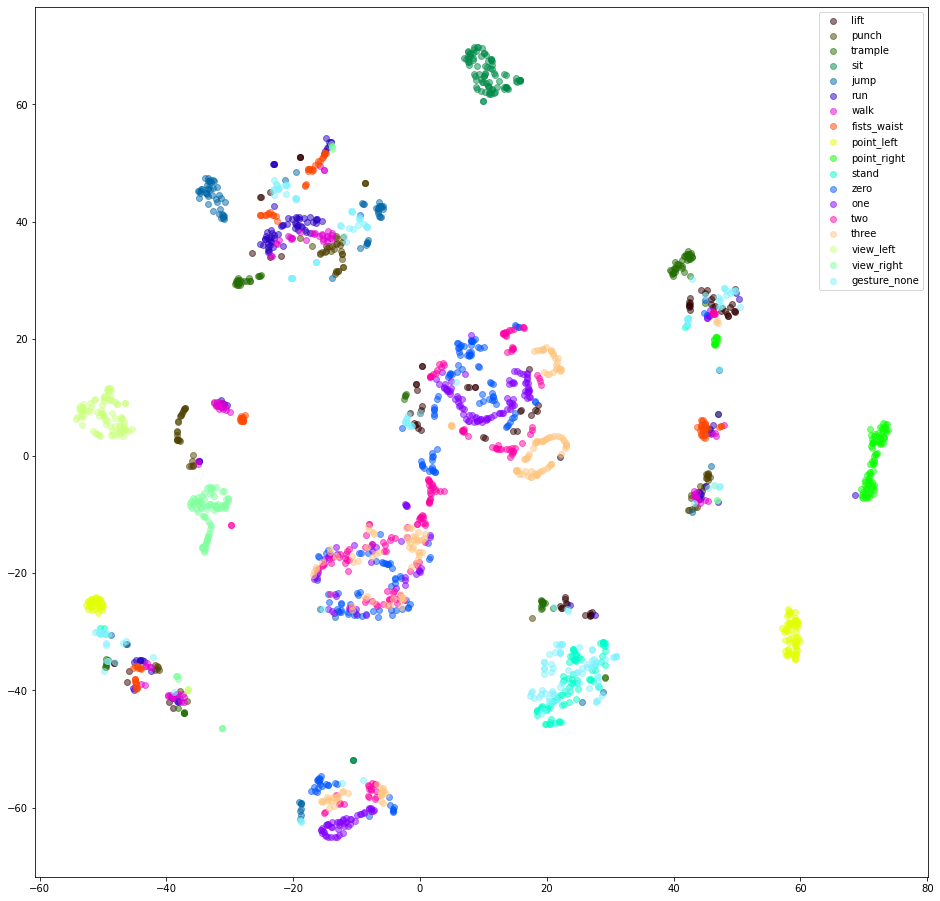

In [18]:
plt.figure(figsize=(16,16))
for i in range(len(actions)):
    mask = df_train.label.values == i
    plt.scatter(X_embedded[mask,0], X_embedded[mask,1], alpha=0.5, 
                c=c[i].reshape(1,4), 
                label=actions[i])

plt.legend()

In [19]:
target_actions = ['one', 'two', 'three']
target_idxs = []
for a in target_actions:
    target_idxs.append(actions.index(a))
target_idxs  

[12, 13, 14]

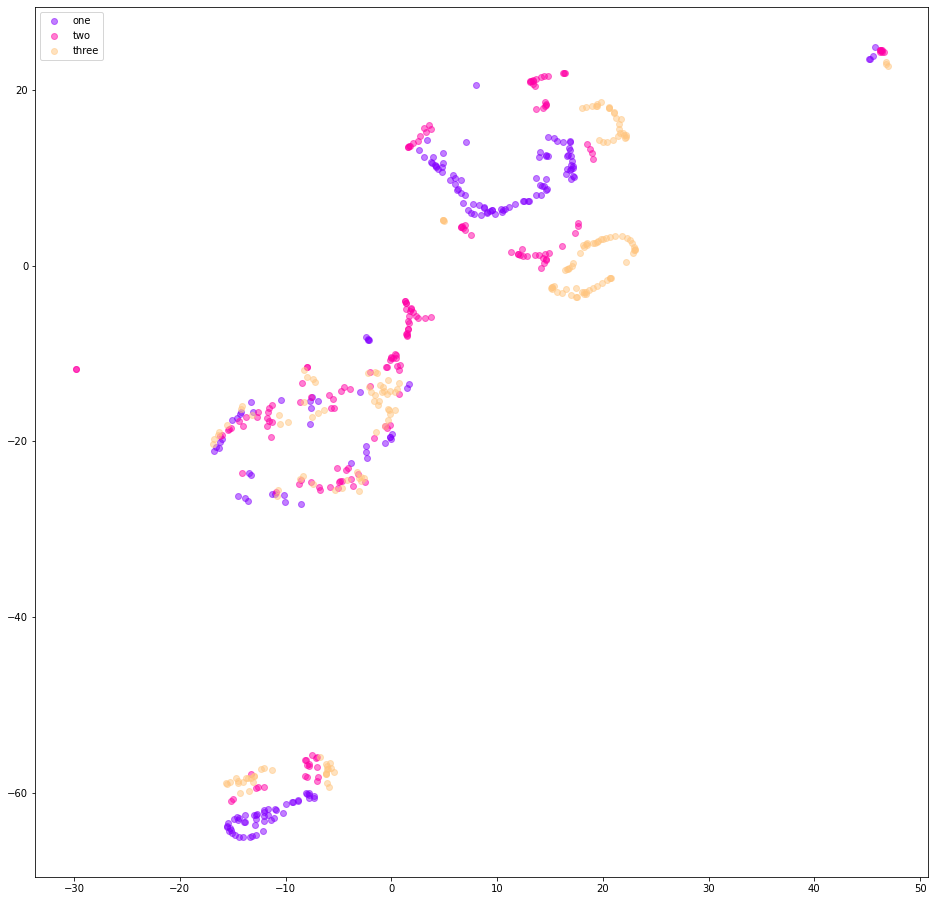

In [20]:
plt.figure(figsize=(16,16))
for idx in target_idxs:
    mask = df_train.label.values == idx
    plt.scatter(X_embedded[mask,0], X_embedded[mask,1], alpha=0.5, 
                c=c[idx].reshape(1,4), 
                label=actions[idx])

plt.legend()

In [21]:
actions_data = []

for idx, a in enumerate(actions):
    mask = df_train.label.values == idx
    data = combined_data[mask]
    random_idx = np.random.choice(list(range(data.shape[0])), size=100, replace=True)
    actions_data.append(data[random_idx].reshape((len(random_idx)), -1))

print(len(actions_data))

18


In [22]:
action_similarities = np.zeros((len(actions), len(actions))) + np.inf

In [23]:
from geomloss import SamplesLoss
Loss = SamplesLoss("energy", blur=0.05)

for a1_idx, a1_data in enumerate(actions_data):
    for a2_idx, a2_data in enumerate(actions_data):
        loss = SamplesLoss("energy", blur=0.05)
        action_similarities[a1_idx, a2_idx] = loss(torch.from_numpy(a1_data), torch.from_numpy(a2_data)).item()

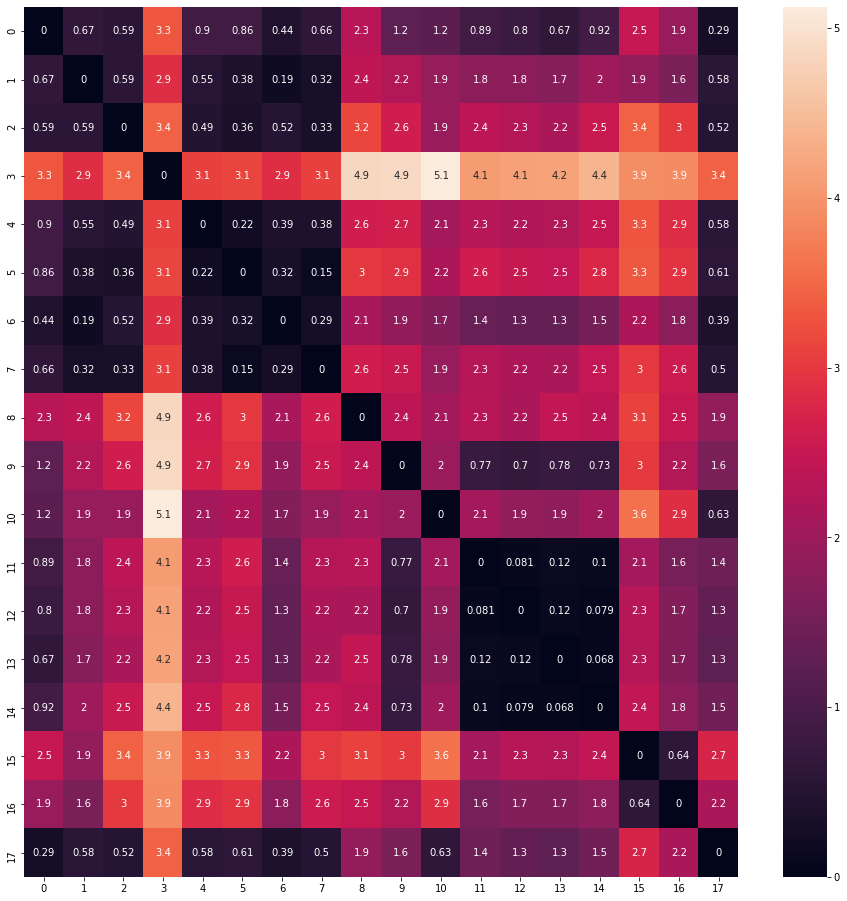

In [24]:
import seaborn as sns
plt.figure(figsize=(16, 16))
sns.heatmap(action_similarities, annot=True)
plt.show()

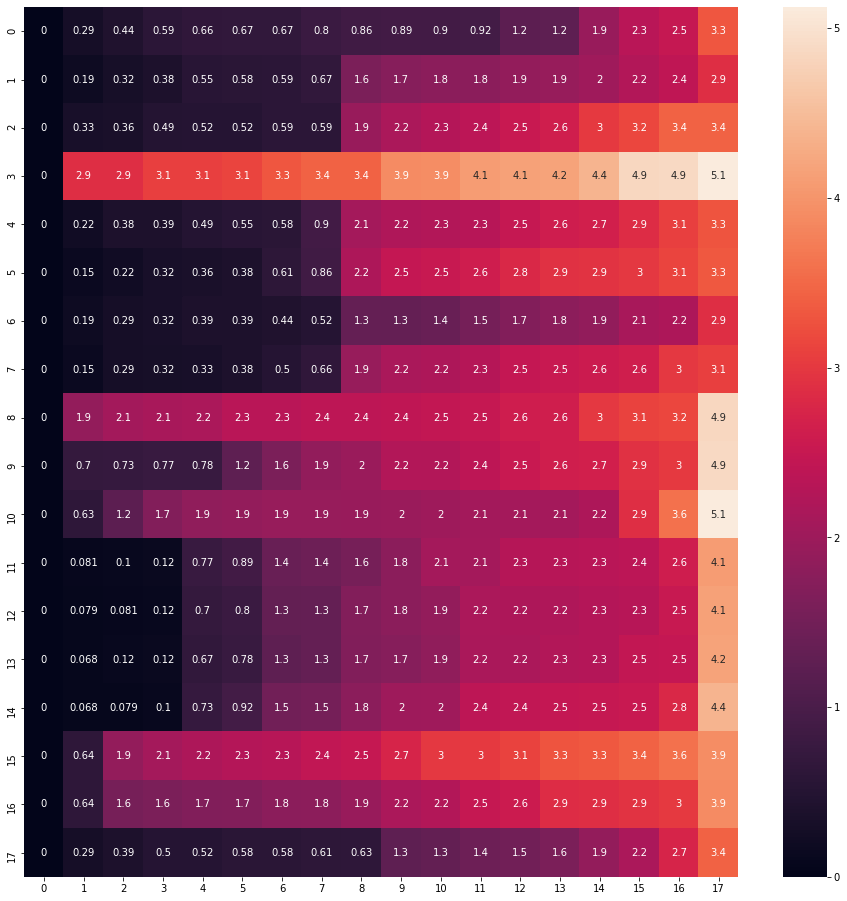

In [25]:
sorted_action_similarities = np.sort(action_similarities, axis=1)
plt.figure(figsize=(16, 16))
sns.heatmap(sorted_action_similarities, annot=True)
plt.show()

In [26]:
threshold = 0.1
np.array(actions)[sorted_action_similarities[:,1] > threshold]

array(['lift', 'punch', 'trample', 'sit', 'jump', 'run', 'walk',
       'fists_waist', 'point_left', 'point_right', 'stand', 'view_left',
       'view_right', 'gesture_none'], dtype='<U12')

In [31]:
df_group = df_train.groupby(['label'], as_index=False).mean()
df_group

,label,n_x,n_y,n_v,lei_x,lei_y,lei_v,le_x,le_y,le_v,...,r_p_m_v,r_p_p_x,r_p_p_y,r_p_p_v,r_p_d_x,r_p_d_y,r_p_d_v,r_p_t_x,r_p_t_y,r_p_t_v
0,0,0.491911,0.777767,0.998732,0.501219,0.803355,0.997303,0.507387,0.802432,0.997536,...,0.0,0.292687,0.046024,0.0,0.298412,0.034317,0.0,0.304151,0.029621,0.0
1,1,0.470445,0.684986,0.977897,0.477873,0.707613,0.976887,0.483130,0.707089,0.972265,...,0.0,0.227248,0.262228,0.0,0.225557,0.262153,0.0,0.224458,0.262577,0.0
2,2,0.408011,0.720558,0.998777,0.409791,0.754940,0.999107,0.415753,0.760266,0.998142,...,0.0,0.236323,0.033677,0.0,0.237804,0.027793,0.0,0.238882,0.024160,0.0
3,3,0.491273,0.850511,0.999990,0.510766,0.902755,0.999987,0.524508,0.898507,0.999982,...,0.0,0.001176,0.002205,0.0,0.001227,0.001825,0.0,0.001384,0.001667,0.0
4,4,0.467287,0.722665,0.976549,0.476771,0.747988,0.984752,0.483059,0.747394,0.981533,...,0.0,0.026448,0.041686,0.0,0.026612,0.041793,0.0,0.026708,0.042014,0.0
5,5,0.494526,0.731291,0.994994,0.503476,0.754515,0.985767,0.509074,0.753382,0.990338,...,0.0,0.100225,0.081427,0.0,0.100685,0.081481,0.0,0.100892,0.081704,0.0
6,6,0.499858,0.710995,0.999808,0.508894,0.732364,0.999663,0.514840,0.730785,0.999694,...,0.0,0.179853,0.145067,0.0,0.179409,0.145445,0.0,0.178865,0.146306,0.0
7,7,0.493944,0.703637,0.998724,0.502651,0.727960,0.995292,0.508385,0.726891,0.997029,...,0.0,0.188466,0.126884,0.0,0.187495,0.127219,0.0,0.187070,0.128489,0.0
8,8,0.507749,0.732720,0.999950,0.517669,0.751069,0.999923,0.523690,0.749352,0.999896,...,0.0,0.093003,0.353705,0.0,0.091510,0.349429,0.0,0.091312,0.347460,0.0
9,9,0.467988,0.759855,0.999932,0.476194,0.781086,0.999904,0.482368,0.779049,0.999918,...,0.0,0.316775,0.059332,0.0,0.323255,0.043645,0.0,0.330165,0.034480,0.0


In [53]:
column_x_right_hand = [key + "_x" for key in W_LIST_RIGHT_HAND]
column_x_left_hand = [key + "_x" for key in W_LIST_LEFT_HAND]
column_x_pose = [key + "_x" for key in W_LIST_POSE]
column_y_right_hand = [key + "_y" for key in W_LIST_RIGHT_HAND]
column_y_left_hand = [key + "_y" for key in W_LIST_LEFT_HAND]
column_y_pose = [key + "_y" for key in W_LIST_POSE]

lift


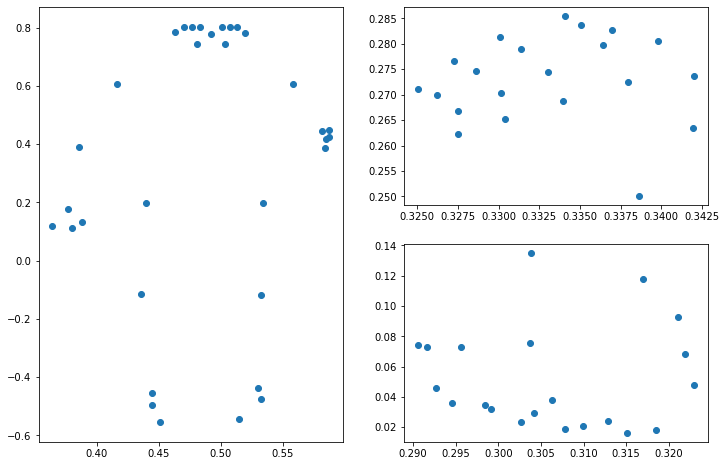

punch


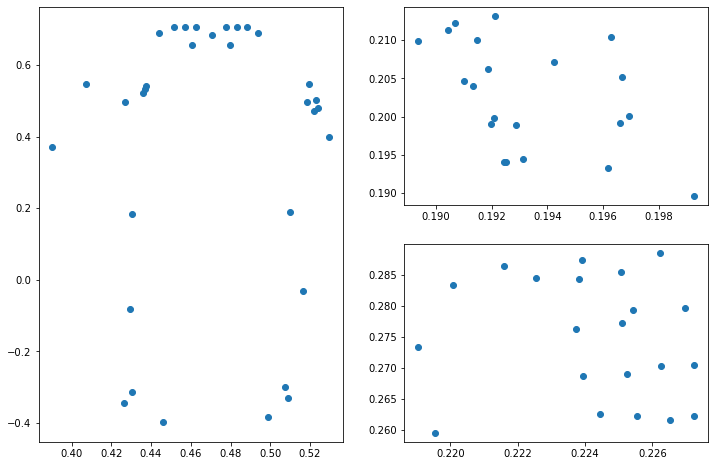

trample


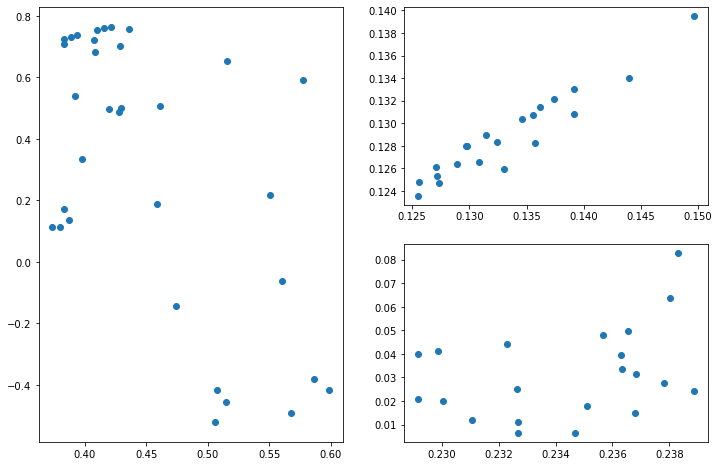

sit


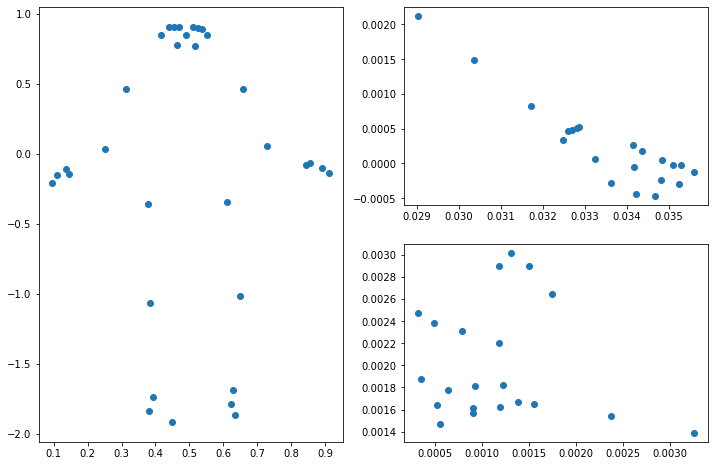

jump


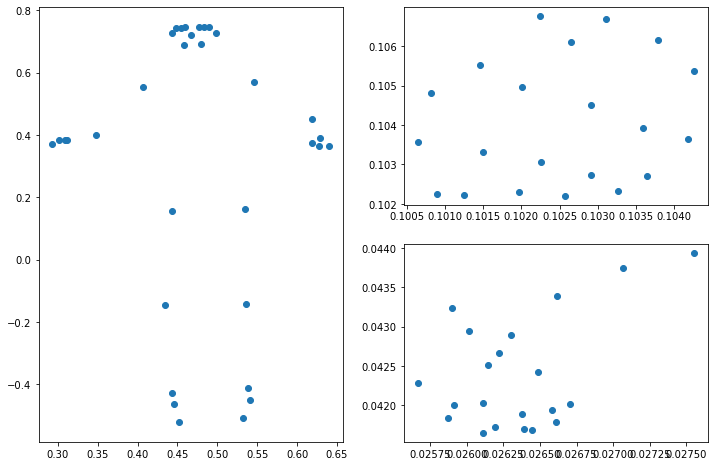

run


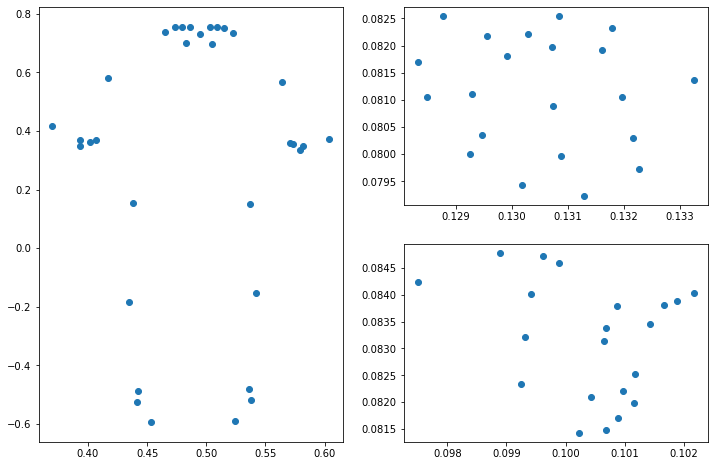

walk


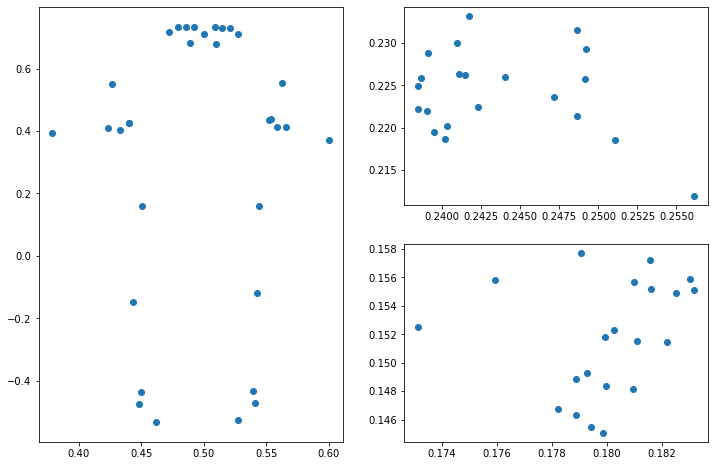

fists_waist


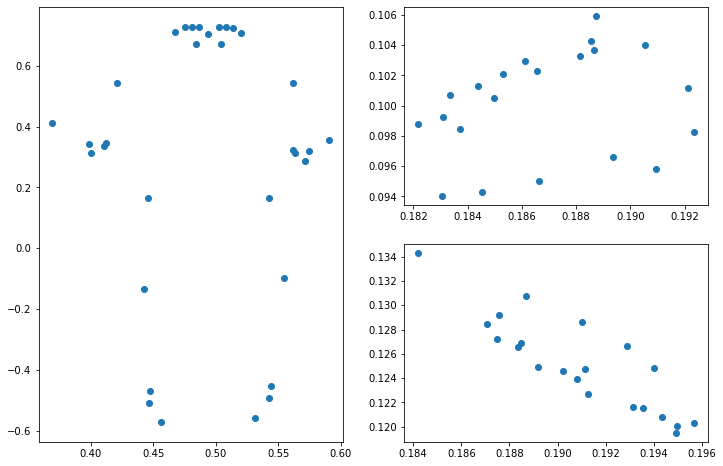

point_left


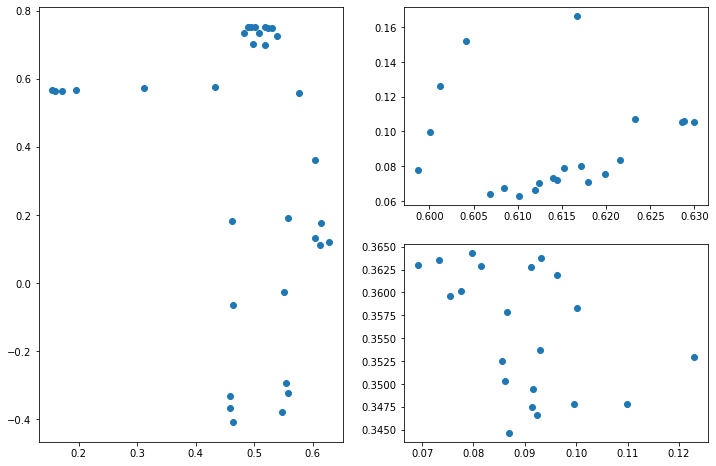

point_right


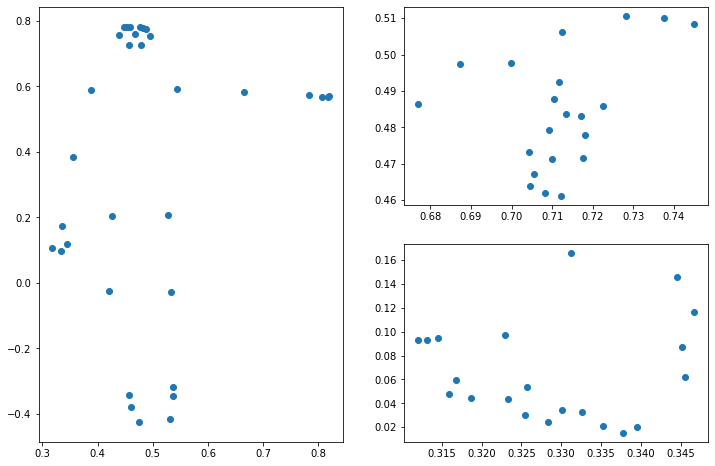

stand


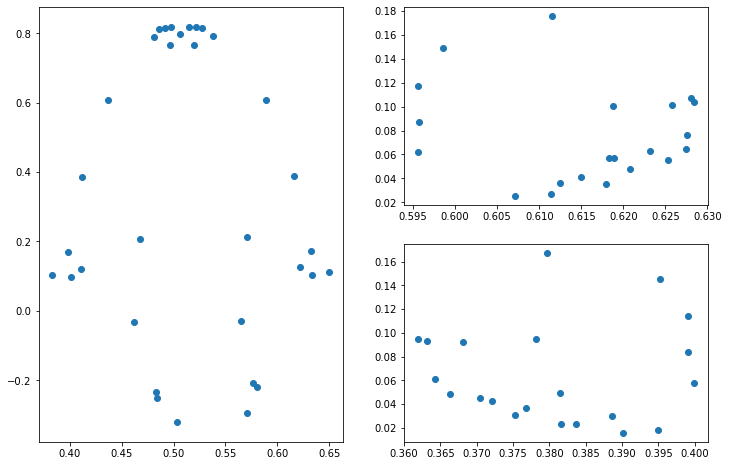

zero


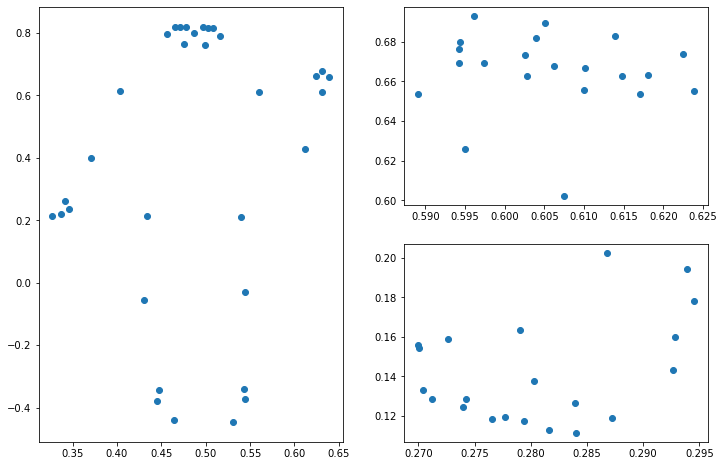

one


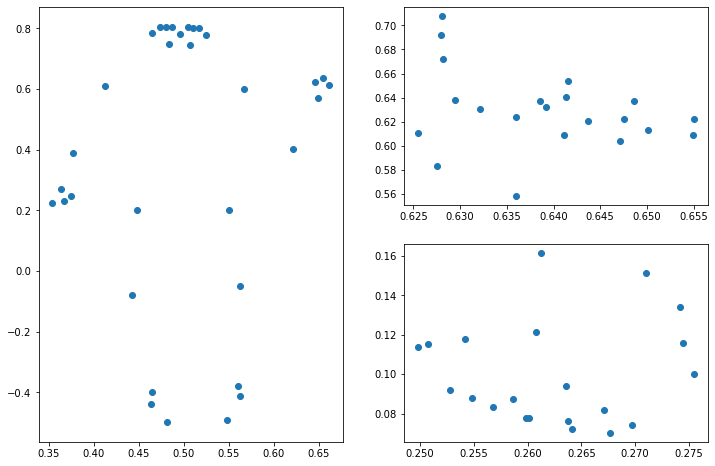

two


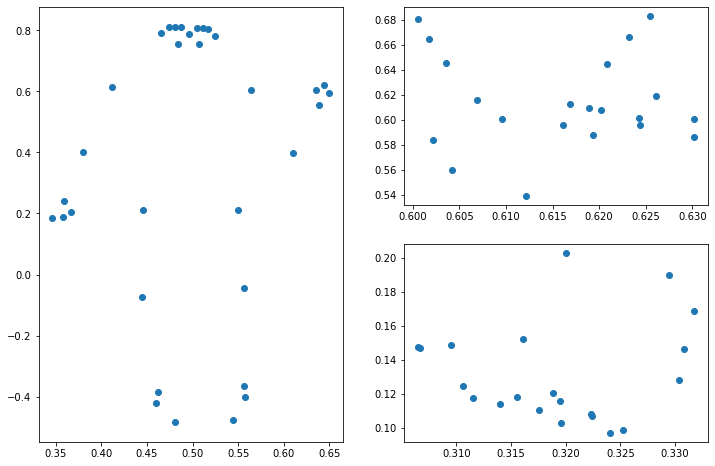

three


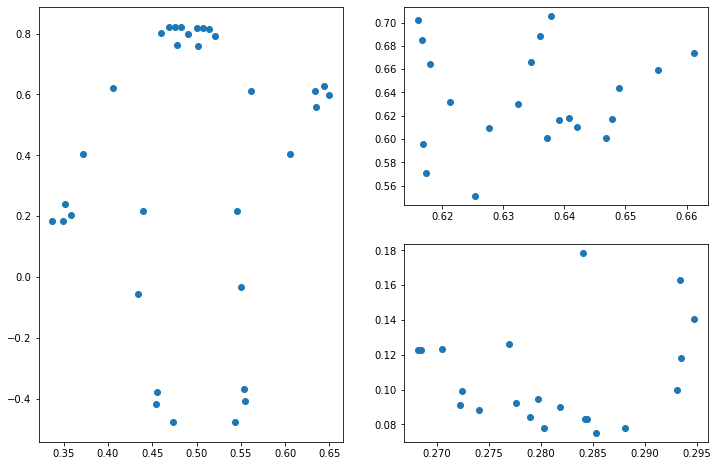

view_left


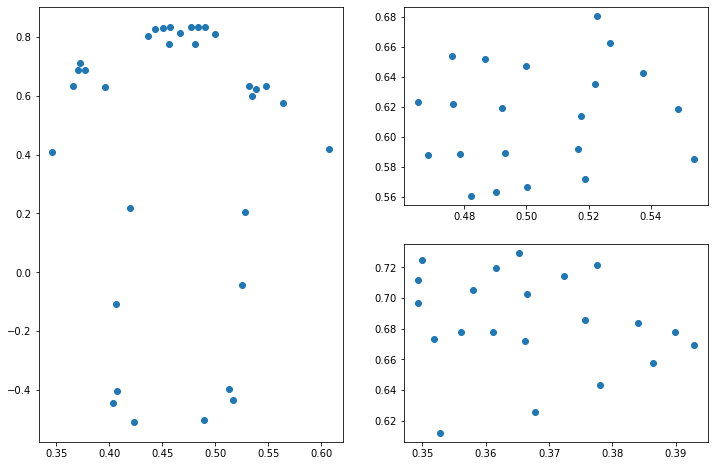

view_right


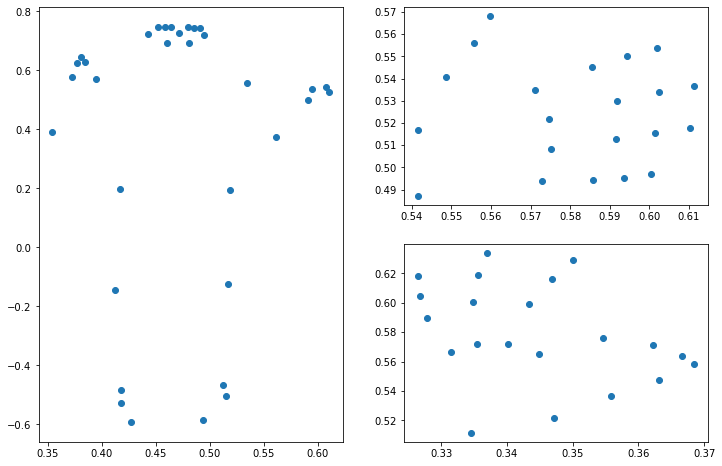

gesture_none


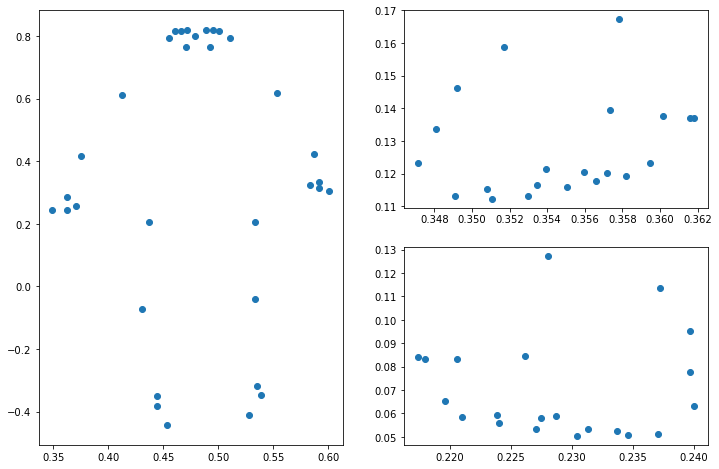

In [60]:
for i in range(len(actions)):
    df_action = df_group[df_group.label == i]
    x_data_pose = df_action.loc[i, column_x_pose].values
    y_data_pose = df_action.loc[i, column_y_pose].values
    x_data_left_hand = df_action.loc[i, column_x_left_hand].values
    y_data_left_hand = df_action.loc[i, column_y_left_hand].values
    x_data_right_hand = df_action.loc[i, column_x_right_hand].values
    y_data_right_hand = df_action.loc[i, column_y_right_hand].values
    print(actions[i])
    plt.figure(figsize=(12,8))
    plt.subplot(121)
    plt.scatter(x_data_pose, y_data_pose)
    plt.subplot(222)
    plt.scatter(x_data_left_hand, y_data_left_hand)
    plt.subplot(224)
    plt.scatter(x_data_right_hand, y_data_right_hand)
    plt.show()